# Spotify Data Analytics

## Data Gathering

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler


In [2]:
# Reading csv files as Dataframe
df_tracks=pd.read_csv('tracks.csv')

# Displaying first few entries in the Dataframe
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


## Data Cleaning

In [3]:
#to check the null values in the dataset and find the total sum
print(pd.isnull(df_tracks).sum())

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


In [4]:
# Displaying information of the DataFrame
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
#sort the df using popularity column
sorted_df_popular=df_tracks.sort_values("popularity",ascending=True)
sorted_df_popular

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.9930,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.9250,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.9930,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.8270,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.8690,0.000000,0.0924,0.372,72.800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.2030,0.553,83.970,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.5430,0.644,118.051,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.1500,0.472,149.996,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.132,143.874,4


In [6]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


# Top 10 most popular songs on spotify

In [7]:
most_popular=df_tracks.query('popularity>90',inplace=False ).sort_values('popularity',ascending=False)
most_popular.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


In [8]:
# # set the release date column as the index of the dataframe
df_tracks.set_index('release_date', inplace=True)
df_tracks.index=pd.to_datetime(df_tracks.index,dayfirst=True)
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [9]:
#find the artists that released songs on 1922-01-01
df_tracks[["artists"]].loc['1922-01-01']

,artists
release_date,
1922-01-01,['Dick Haymes']
1922-01-01,['Dick Haymes']
1922-01-01,['Francis Marty']
1922-01-01,['Mistinguett']
1922-01-01,['Greg Fieler']
...,...
1922-01-01,"['Abe Lyman’s Orchestra', 'Abe Lyman']"
1922-01-01,"['Abe Lyman’s Orchestra', 'Abe Lyman']"
1922-01-01,"['Paul Whiteman & His Orchestra', 'Paul Whitem..."


# Data Visualization

## Convert the duration time from milliseconds to minutes

In [10]:
df_tracks['duration']=df_tracks['duration_ms'].apply(lambda x:(round(x/1000))/60)
df_tracks.drop('duration_ms',inplace=True,axis=1)

In [11]:
df_tracks.duration.head()

release_date
1922-02-22    2.116667
1922-06-01    1.633333
1922-03-21    3.033333
1922-03-21    2.950000
1922-01-01    2.716667
Name: duration, dtype: float64

# Plot a correlation map 

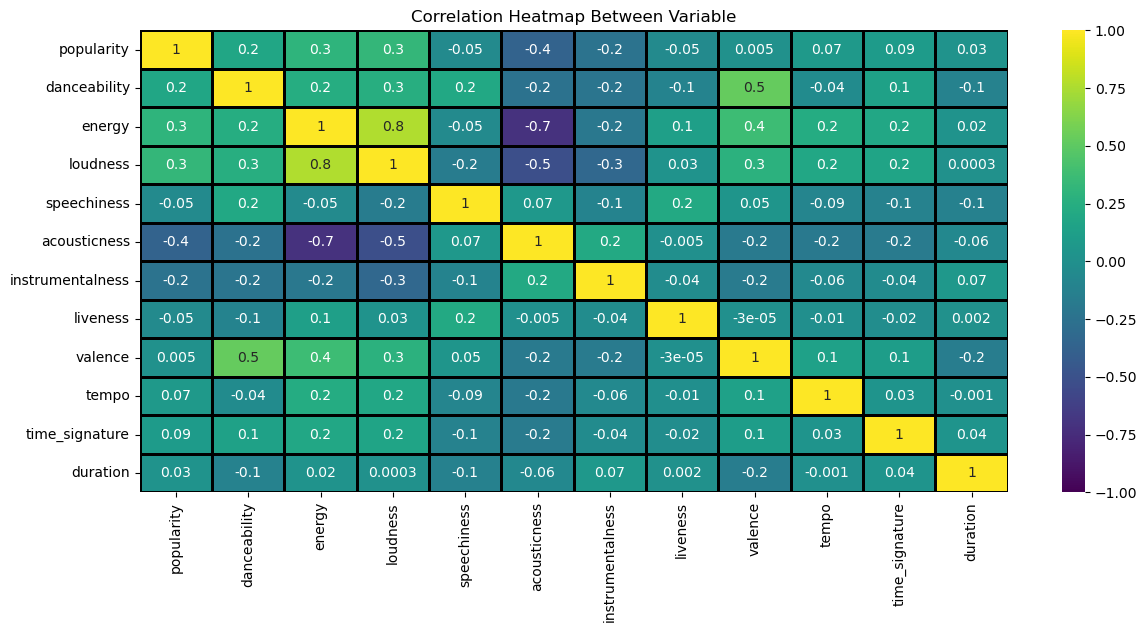

In [12]:
corr_df=df_tracks.drop(['key','mode','explicit'],axis=1).corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt='.1g',vmin=-1,vmax=1,center=0,cmap='viridis',linewidths=1,linecolor='Black')
heatmap.set_title('Correlation Heatmap Between Variable')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)
plt.show()

# Create regression plots using .4% of whole data

In [13]:
sample_df=df_tracks.sample(int(0.004*len(df_tracks)))
print('Length of the sample_df=',len(sample_df))
sample_df

Length of the sample_df= 2346


,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
2016-12-02,2fV9z65hwYlvX8hYtbEQIZ,Ziet Em Duun,36,0,['Van Echelpoel'],['5Jbg2Yf0WDUTlW5oEMYiUN'],0.781,0.8780,11,-6.415,0,0.0641,0.05250,0.092100,0.1110,0.4230,124.966,4,2.916667
2009-02-16,4g6YqnAwoEm44Nvlc9oFFd,Ikaw Pa Rin Ang Mamahalin,45,0,['APRIL BOYS'],['3d5g9VpiJlxNVmBNcZU4Pl'],0.421,0.3510,4,-12.846,1,0.0279,0.56100,0.000506,0.1420,0.2510,130.185,4,4.916667
2007-01-01,18j3OSYaa6d0PjIQetsTKc,Non Ti Ho Mai Detto,48,0,['Mondo Marcio'],['6Fd10Q3sQq1NsvpFTlvMsN'],0.742,0.4610,10,-10.790,0,0.2110,0.00885,0.000135,0.0969,0.6180,150.008,4,4.266667
2011-01-01,4wAJ8aQ9Ufj9ylfWESkrDL,Do It Like A Dude,60,1,['Jessie J'],['2gsggkzM5R49q6jpPvazou'],0.663,0.8430,2,-3.672,1,0.0490,0.04910,0.000000,0.3640,0.3750,140.036,4,3.250000
1932-01-01,6B7pRtOxVRfM0CLQvbsXOd,Dove sta Zazà?,0,0,['Nino Taranto'],['1Qf2YbvkSLqXQAGNc8ul21'],0.708,0.3410,1,-11.990,1,0.4980,0.98600,0.000068,0.6570,0.8260,66.136,5,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-01-01,5TNmuycXFf2UOCB49jzoen,Beautiful,36,0,['Maranatha! Acoustic'],['73zgO2XG76Gex8hkx1mbLk'],0.547,0.0886,5,-16.845,1,0.0294,0.88600,0.000000,0.1170,0.3620,79.391,3,2.666667
1930-01-01,1uwXHQCuJUDov9JF9cTZYu,Mi thes na tirraniemai,0,0,['Stellakis Perpiniadis'],['0huMeTK6uba9aYAE69Dmsz'],0.656,0.2580,11,-13.803,1,0.0492,0.99400,0.298000,0.2820,0.8430,105.496,4,3.000000
2020-11-11,5A6YvJBeoAsscmWAfAOiYb,Waves of Oblivion (2006),0,0,['Glenn Murawski'],['08r2gyB8gY9jKznJNKc4q5'],0.426,0.3250,4,-11.992,0,0.0366,0.67200,0.824000,0.5420,0.0975,111.079,4,3.600000


# Regression map between Loudness and Energy

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

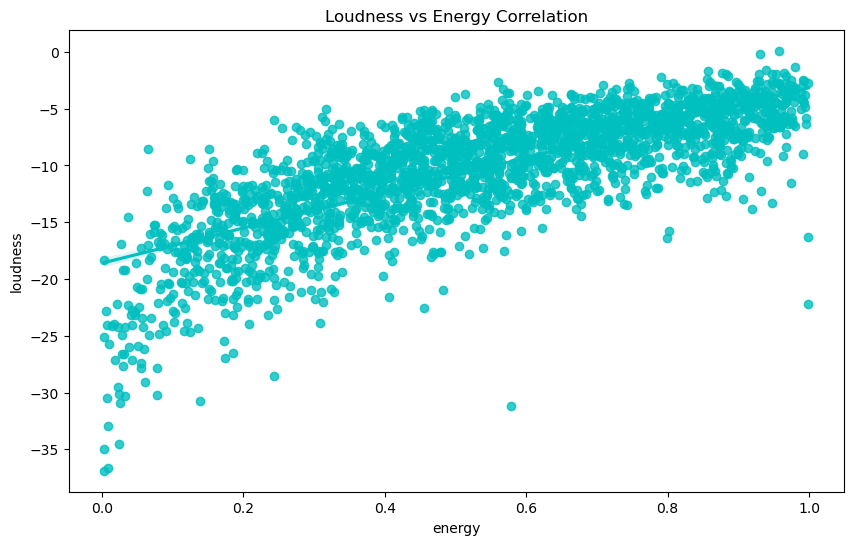

In [14]:
#Plot Regression map between Loudness & Energy
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y='loudness',x='energy',color='c').set(title='Loudness vs Energy Correlation')


The above graph denotes that the energy and loudness of the songs on Spotify are positively and strongly correlated.

# Correlation between Popularity and Acousticness

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

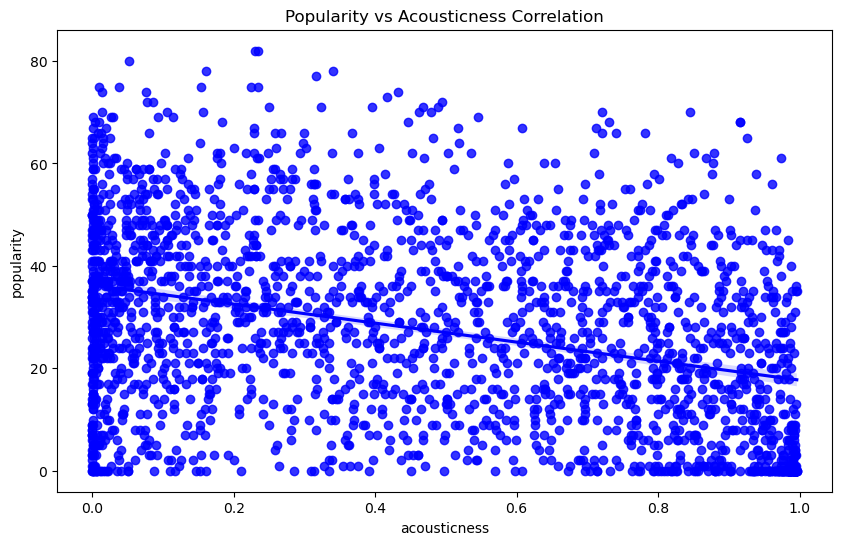

In [15]:
#plot regression map between popularity and acousticness 
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y='popularity',x='acousticness',color='b').set(title='Popularity vs Acousticness Correlation')


The above graph denotes that Popularity and Acousticness of songs on Spotify are negatively and weakly correlated.

In [16]:
#Create a new column called 'dates' in the df_tracks
df_tracks['dates']=df_tracks.index.get_level_values('release_date')
df_tracks.dates=pd.to_datetime(df_tracks.dates)
years=df_tracks.dates.dt.year #extract years from the dates

In [17]:
type(years)

pandas.core.series.Series

# Total number of songs vs Years

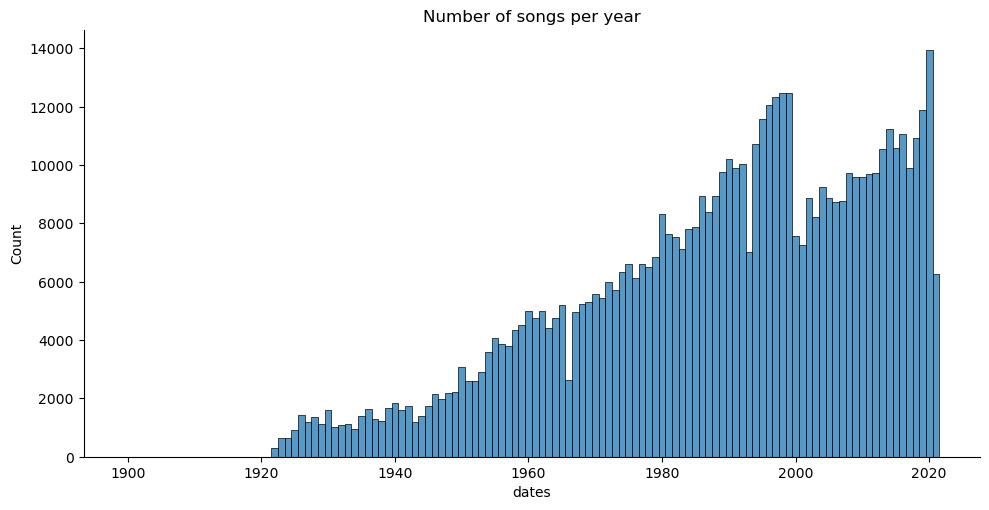

In [18]:
#plot the distribution of total no. of songs in each year since 1922 on spotify
sns.displot(years,discrete=True,aspect=2,height=5,kind='hist').set(title='Number of songs per year')

# Total Duration of Songs Vs Years

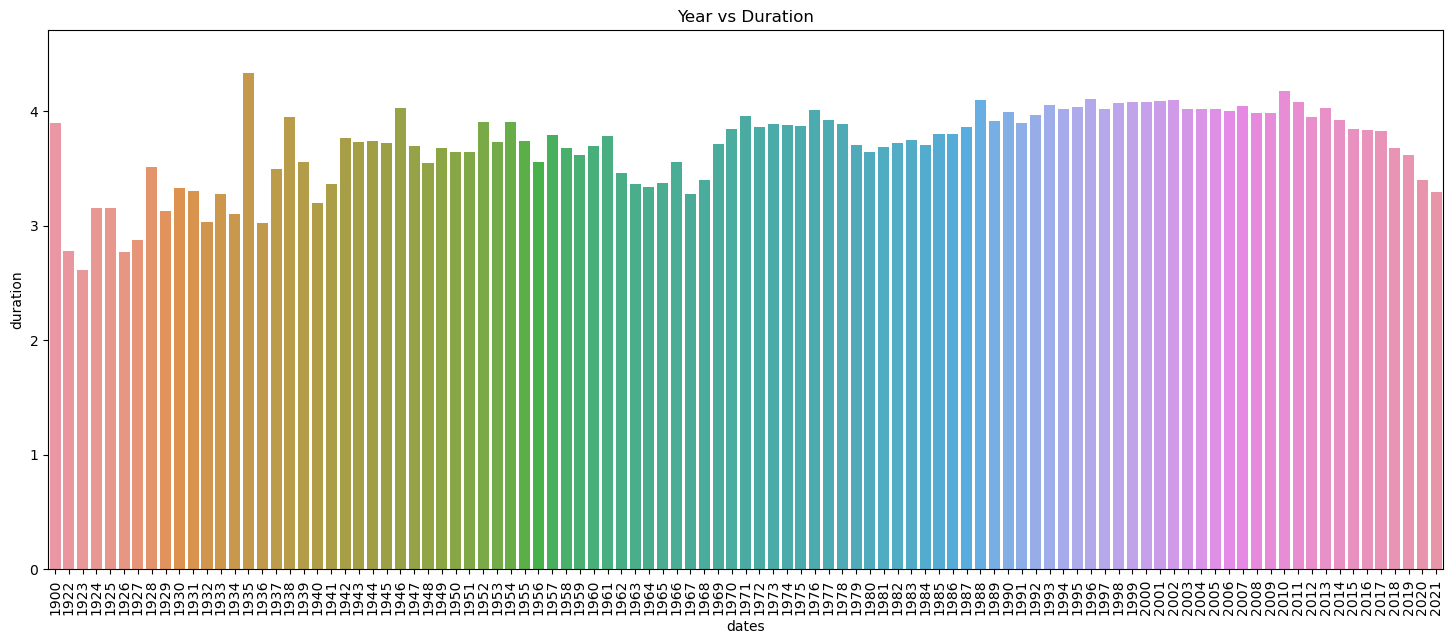

In [19]:
# Using matplotlib.pyplot for barplot
total_dr=df_tracks.duration
fig_dims=(18,7)
fig,ax=plt.subplots(figsize=fig_dims)
fig=sns.barplot(x=years,y=total_dr,ax=ax,errwidth=False).set(title='Year vs Duration')
plt.xticks(rotation=90)
plt.show()

In [20]:
df_tracks

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,2.116667,1922-02-22
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1.633333,1922-06-01
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,3.033333,1922-03-21
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,2.950000,1922-03-21
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,2.716667,1922-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,5rgu12WBIHQtvej2MdHSH0,云与海,50,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,4.300000,2020-09-26
2020-10-21,0NuWgxEp51CutD2pJoF4OM,blind,72,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2.550000,2020-10-21
2020-09-02,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,3.133333,2020-09-02


In [21]:
sample_df

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
2016-12-02,2fV9z65hwYlvX8hYtbEQIZ,Ziet Em Duun,36,0,['Van Echelpoel'],['5Jbg2Yf0WDUTlW5oEMYiUN'],0.781,0.8780,11,-6.415,0,0.0641,0.05250,0.092100,0.1110,0.4230,124.966,4,2.916667
2009-02-16,4g6YqnAwoEm44Nvlc9oFFd,Ikaw Pa Rin Ang Mamahalin,45,0,['APRIL BOYS'],['3d5g9VpiJlxNVmBNcZU4Pl'],0.421,0.3510,4,-12.846,1,0.0279,0.56100,0.000506,0.1420,0.2510,130.185,4,4.916667
2007-01-01,18j3OSYaa6d0PjIQetsTKc,Non Ti Ho Mai Detto,48,0,['Mondo Marcio'],['6Fd10Q3sQq1NsvpFTlvMsN'],0.742,0.4610,10,-10.790,0,0.2110,0.00885,0.000135,0.0969,0.6180,150.008,4,4.266667
2011-01-01,4wAJ8aQ9Ufj9ylfWESkrDL,Do It Like A Dude,60,1,['Jessie J'],['2gsggkzM5R49q6jpPvazou'],0.663,0.8430,2,-3.672,1,0.0490,0.04910,0.000000,0.3640,0.3750,140.036,4,3.250000
1932-01-01,6B7pRtOxVRfM0CLQvbsXOd,Dove sta Zazà?,0,0,['Nino Taranto'],['1Qf2YbvkSLqXQAGNc8ul21'],0.708,0.3410,1,-11.990,1,0.4980,0.98600,0.000068,0.6570,0.8260,66.136,5,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-01-01,5TNmuycXFf2UOCB49jzoen,Beautiful,36,0,['Maranatha! Acoustic'],['73zgO2XG76Gex8hkx1mbLk'],0.547,0.0886,5,-16.845,1,0.0294,0.88600,0.000000,0.1170,0.3620,79.391,3,2.666667
1930-01-01,1uwXHQCuJUDov9JF9cTZYu,Mi thes na tirraniemai,0,0,['Stellakis Perpiniadis'],['0huMeTK6uba9aYAE69Dmsz'],0.656,0.2580,11,-13.803,1,0.0492,0.99400,0.298000,0.2820,0.8430,105.496,4,3.000000
2020-11-11,5A6YvJBeoAsscmWAfAOiYb,Waves of Oblivion (2006),0,0,['Glenn Murawski'],['08r2gyB8gY9jKznJNKc4q5'],0.426,0.3250,4,-11.992,0,0.0366,0.67200,0.824000,0.5420,0.0975,111.079,4,3.600000


# Genre dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Reading csv file as DataFrame
df_genre=pd.read_csv('SpotifyFeatures.csv')

In [24]:
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [25]:
Popular_genre=df_genre[['genre', 'popularity']].sort_values(by="popularity",ascending=False)
Popular_genre=Popular_genre.drop_duplicates(subset = "popularity")
#Popular_genre=Popular_genre.head(25)
Popular_genre

,genre,popularity
9027,Dance,100
86951,Rap,99
66643,Hip-Hop,98
107829,Pop,97
107851,Pop,96
...,...,...
82389,Opera,4
105941,Opera,3
73135,Children's Music,2
74533,Children's Music,1


In [26]:
V=[]
for i in Popular_genre.genre.value_counts().index.tolist():
    c = Popular_genre[Popular_genre['genre'].str.contains(i)]['popularity'].sum()
    V.append(c)
 
#Initialize data
genre = Popular_genre.genre.value_counts().index.tolist()
popularity = V

# Create a pandas dataframe
pop_vs_genre_df = pd.DataFrame({"genre": genre,
                   "popularity": popularity})

In [27]:
pop_vs_genre_df.sort_values('popularity')

,genre,popularity
21,Children's Music,3
3,Opera,24
23,Soul,43
22,Indie,52
20,Soundtrack,56
15,Comedy,65
9,Anime,69
24,Folk,74
2,Movie,75
18,Jazz,89


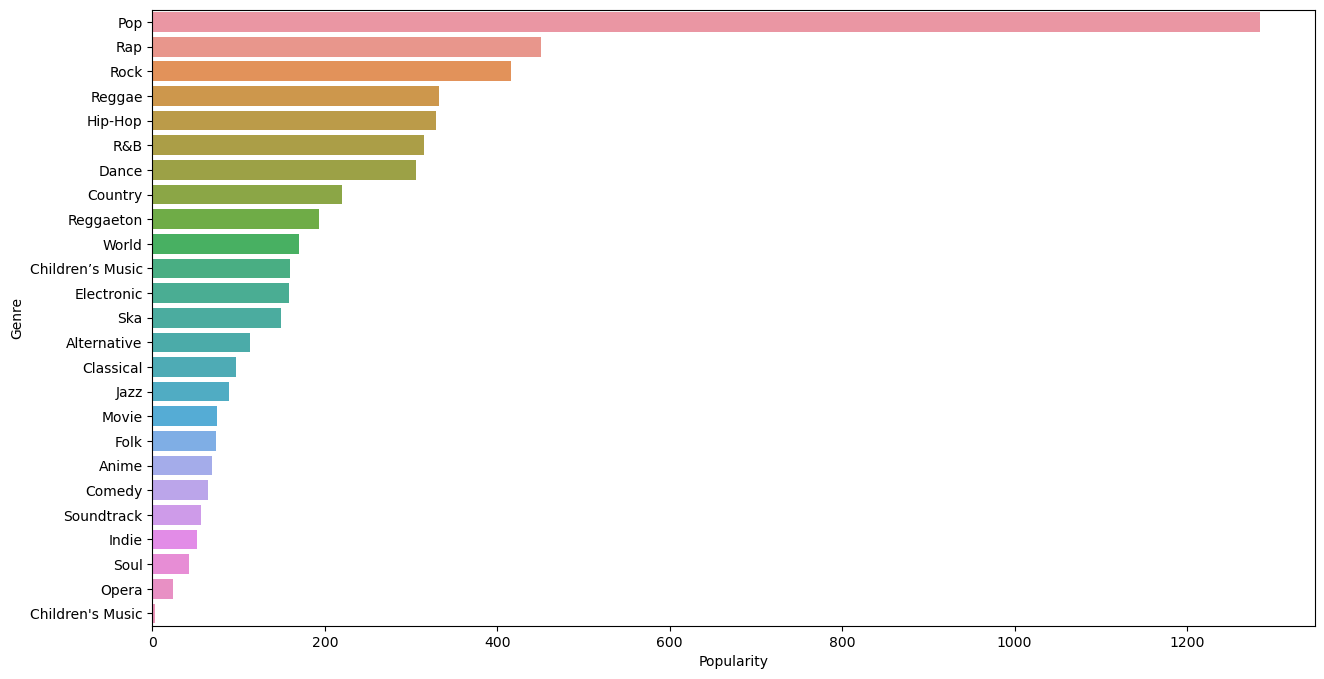

In [28]:
# plt.title('Popularity of the Songs in Different Genres')
sns.color_palette('rocket',as_cmap=True)
plt.figure(figsize=(15,8))
sns.barplot(y='genre',x='popularity',data=pop_vs_genre_df,order=pop_vs_genre_df.sort_values('popularity',ascending = False).genre,ci=None)
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.show()

# RESULT ANALYSIS

In [29]:
df_tracks_new = df_tracks

In [30]:
df_tracks_new.reset_index(inplace=True)
df_tracks_new['release_date'] = pd.to_datetime(df_tracks_new['release_date'])


In [31]:
df_tracks_new = df_tracks.drop(['id', 'artists','id_artists','release_date','dates'], axis=1)
df_tracks_new.head()

,name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,Carve,6,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,2.116667
1,Capítulo 2.16 - Banquero Anarquista,0,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1.633333
2,Vivo para Quererte - Remasterizado,0,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,3.033333
3,El Prisionero - Remasterizado,0,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,2.950000
4,Lady of the Evening,0,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,2.716667


In [32]:
numeric_cols = df_tracks_new.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
df_tracks_new[numeric_cols] = scaler.fit_transform(df_tracks_new[numeric_cols])

In [33]:
df_tracks_new.head()

,name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,Carve,-1.174160,-0.214754,0.490096,-0.385182,-1.483654,-0.615393,0.719665,1.924128,0.642528,2.362779,-0.341434,-1.650527,-0.457392,-1.845842,-0.814462
1,Capítulo 2.16 - Banquero Anarquista,-1.500768,-0.214754,0.791115,-1.107625,-1.483654,-2.344110,0.719665,4.736917,0.995129,-0.425120,-0.357710,0.398600,-0.552876,-6.072724,-1.043664
2,Vivo para Quererte - Remasterizado,-1.500768,-0.214754,-0.780204,-1.449000,-1.199517,-2.156266,0.719665,-0.298309,1.559864,-0.343432,-0.010498,-0.369823,0.401596,2.381040,-0.379769
3,El Prisionero - Remasterizado,-1.500768,-0.214754,-1.460507,-1.776084,0.505310,-3.488663,0.719665,-0.302756,1.562730,3.014787,-0.596418,-0.602678,1.730782,-1.845842,-0.419287
4,Lady of the Evening,-1.500768,-0.214754,-0.972856,-1.524420,-0.631241,-1.315289,-1.389536,-0.366127,1.545530,0.062013,0.526596,-1.382743,-0.512190,0.267599,-0.529936


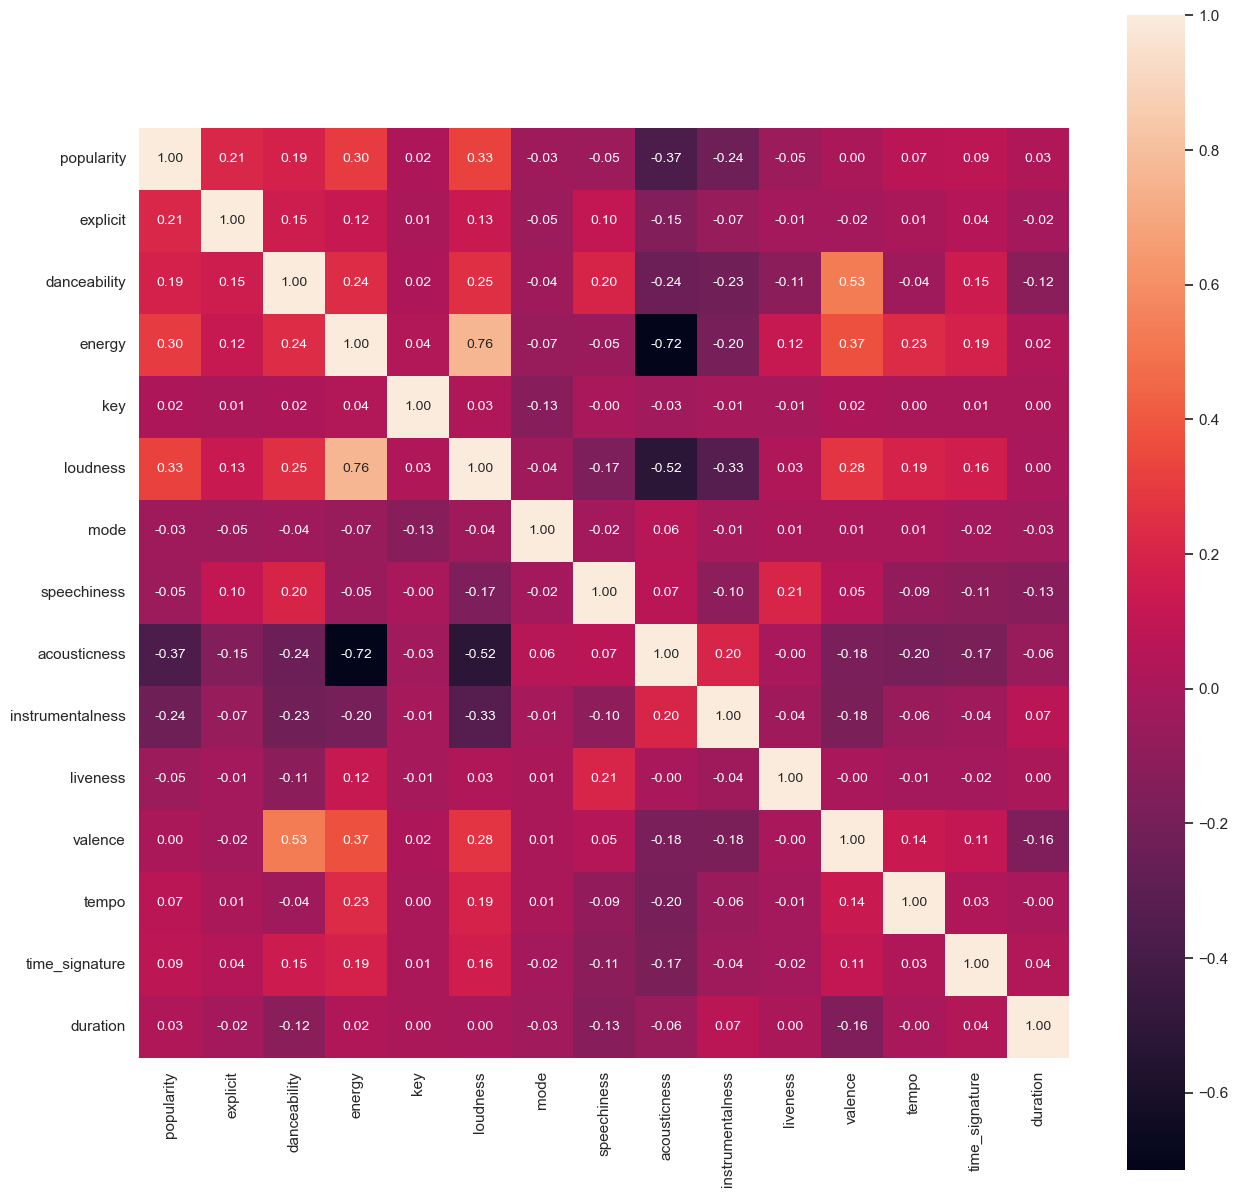

In [34]:
# Correlation matrix for the features
corr_matrix = np.corrcoef(df_tracks_new[numeric_cols].T)
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(corr_matrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df_tracks_new[numeric_cols].columns,
                 xticklabels=df_tracks_new[numeric_cols].columns)
plt.show()

In [35]:
# Splitting the data into popular and less popular songs
popular_songs = df_tracks_new[df_tracks_new['popularity']>3]
less_popular_songs = df_tracks_new[df_tracks_new['popularity']<0]

In [36]:
import numpy as np

# Make copies of the original dataframes to avoid SettingWithCopyWarning
popular_songs_copy = popular_songs.copy()
less_popular_songs_copy = less_popular_songs.copy()
popular_songs_copy.fillna(0, inplace=True)
less_popular_songs_copy.fillna(0, inplace=True)

# Drop NaN values from the copies
popular_songs_copy.dropna(inplace=True)
less_popular_songs_copy.dropna(inplace=True)

# Calculate the mean features for each group
popular_features = np.nanmean(popular_songs_copy[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']].values, axis=0)
less_popular_features = np.nanmean(less_popular_songs_copy[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']].values, axis=0)





In [37]:
df_sorted=df_tracks_new.sort_values(by='popularity', ascending=False)
df_sorted

,name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
93802,Peaches (feat. Daniel Caesar & Giveon),3.942704,4.656496,0.682748,0.611156,-1.483654,0.790884,0.719665,0.078583,-0.369407,-0.425120,1.117941,-0.342656,-0.955341,0.267599,-0.253313
93803,drivers license,3.888269,4.656496,0.128873,-0.420907,1.357723,0.283941,0.719665,-0.248835,0.777262,-0.425071,-0.590993,-1.631122,0.853685,0.267599,0.094442
93804,Astronaut In The Ocean,3.833835,-0.214754,1.290806,0.607186,-0.347103,0.656485,-1.389536,-0.075398,-0.787942,-0.425120,-0.346859,-0.311609,1.059369,0.267599,-0.767041
92810,Save Your Tears,3.779400,4.656496,0.700809,1.127187,-1.483654,0.927248,0.719665,-0.411154,-1.228836,-0.425074,1.785239,0.355910,-0.013905,0.267599,-0.111050
92811,telepatía,3.779400,-0.214754,0.538259,-0.071593,1.641861,0.233836,-1.389536,-0.303868,-0.968542,-0.425120,-0.059325,0.002746,-1.158942,0.267599,-0.553646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23410,O Pardesi Musafir,-1.500768,-0.214754,0.712850,-0.940908,-1.199517,0.323828,0.719665,-0.261620,1.359197,-0.425120,-0.515040,1.388235,1.155256,-1.845842,-0.253313
23409,Mere Dil Mein Aao Aur Bas Jao,-1.500768,-0.214754,-0.220309,-1.345794,0.505310,-0.784571,0.719665,-0.212146,1.548397,-0.425076,-0.460788,0.526670,1.756081,0.267599,-0.466708
23408,"Diversions, Op. 21: Variation 9, Toccata I",-1.500768,-0.214754,-0.738061,-1.190984,0.221172,-3.648802,0.719665,-0.403371,1.373530,3.153433,-0.531316,-0.094277,0.456763,0.267599,-1.446744
23407,John Henry,-1.500768,-0.214754,0.177036,0.817568,-0.915379,0.725453,-1.389536,1.673979,1.255996,-0.343432,2.528490,0.697431,0.173671,0.267599,-0.316541


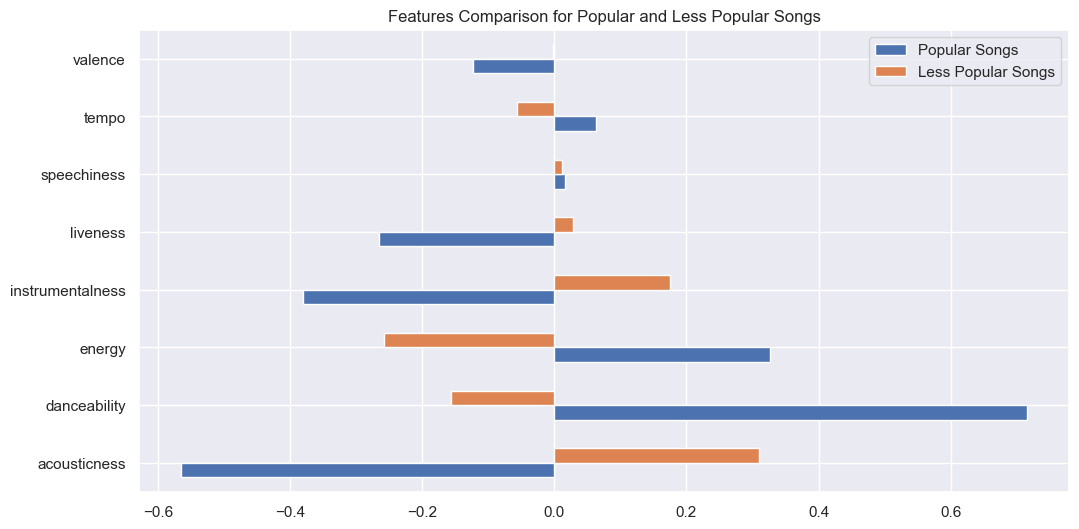

In [38]:
# Convert numpy arrays to pandas Series
popular_features_series = pd.Series(popular_features, index=['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'])
less_popular_features_series = pd.Series(less_popular_features, index=['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'])

# Concatenate the Series and plot the bar chart
features_compare = pd.concat([popular_features_series, less_popular_features_series], axis=1)
features_compare.columns = ['Popular Songs', 'Less Popular Songs']
features_compare.plot(kind='barh', figsize=(12, 6))
plt.title('Features Comparison for Popular and Less Popular Songs')
plt.show()

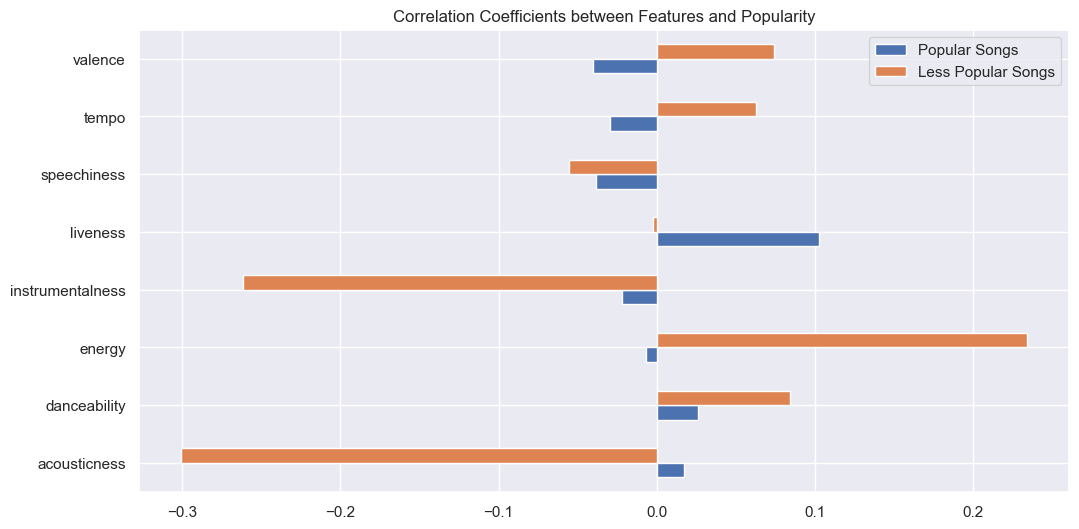

In [39]:
# Concatenate the correlation coefficients and plot them side by side
popular_corr = popular_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'popularity']].corr()['popularity'][:-1]
less_popular_corr = less_popular_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'popularity']].corr()['popularity'][:-1]
corr_compare = pd.concat([popular_corr, less_popular_corr], axis=1)
corr_compare.columns = ['Popular Songs', 'Less Popular Songs']
corr_compare.plot(kind='barh', figsize=(12, 6))
plt.title('Correlation Coefficients between Features and Popularity')
plt.show()

In [40]:
# Suggesting ways to improve less popular songs
less_popular_features_df = less_popular_songs_copy[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']].mean().to_frame()
popular_features_df = popular_songs_copy[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']].mean().to_frame()
difference_df = popular_features_df - less_popular_features_df
difference_df.columns = ['Difference']
sorted_df = difference_df.sort_values(by='Difference', ascending=False)
print('Features to improve for less popular songs:\n')
print(sorted_df)

Features to improve for less popular songs:

                  Difference
danceability        0.870954
energy              0.584159
tempo               0.118883
speechiness         0.004158
valence            -0.120635
liveness           -0.294617
instrumentalness   -0.555639
acousticness       -0.874169


In [41]:
# Extract the correlation coefficients of features with popularity for popular and less popular songs
popular_corr = popular_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'popularity']].corr()['popularity'][:-1]
less_popular_corr = less_popular_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'popularity']].corr()['popularity'][:-1]

# Compare the correlation coefficients and identify the features that have higher correlation with popularity in popular songs
improvement_features = []
for feature in popular_corr.index:
    if popular_corr[feature] > less_popular_corr[feature]:
        improvement_features.append(feature)

# Suggest improvements for the identified features
if len(improvement_features) == 0:
    print("There are no features that have a higher correlation with popularity in popular songs but a lower correlation in less popular songs.")
else:
    print("To improve the popularity of less popular songs, consider focusing on the following features:")
    for feature in improvement_features:
        if feature == 'acousticness':
            print("- Reducing the acousticness of the songs.")
        elif feature == 'danceability':
            print("- Increasing the danceability of the songs.")
        elif feature == 'energy':
            print("- Increasing the energy of the songs.")
        elif feature == 'instrumentalness':
            print("- Reducing the instrumentalness of the songs.")
        elif feature == 'liveness':
            print("- Increasing the liveness of the songs.")
        elif feature == 'speechiness':
            print("- Increasing the speechiness of the songs.")
        elif feature == 'tempo':
            print("- Increasing the tempo of the songs.")
        elif feature == 'valence':
            print("- Increasing the valence of the songs.")



To improve the popularity of less popular songs, consider focusing on the following features:
- Reducing the acousticness of the songs.
- Reducing the instrumentalness of the songs.
- Increasing the liveness of the songs.
- Increasing the speechiness of the songs.


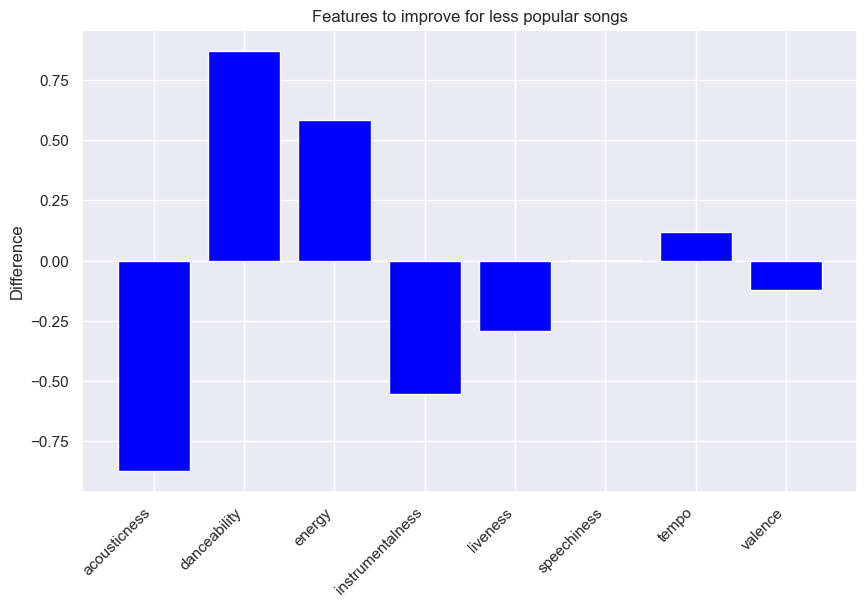

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Data
less_popular_features = less_popular_songs_copy[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']].mean().values
popular_features = popular_songs_copy[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']].mean().values
difference = popular_features - less_popular_features

# Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(np.arange(len(difference)), difference, color='blue')
ax.set_xticks(np.arange(len(difference)))
ax.set_xticklabels(['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'], rotation=45, ha='right')
ax.set_ylabel('Difference')
ax.set_title('Features to improve for less popular songs')
plt.show()


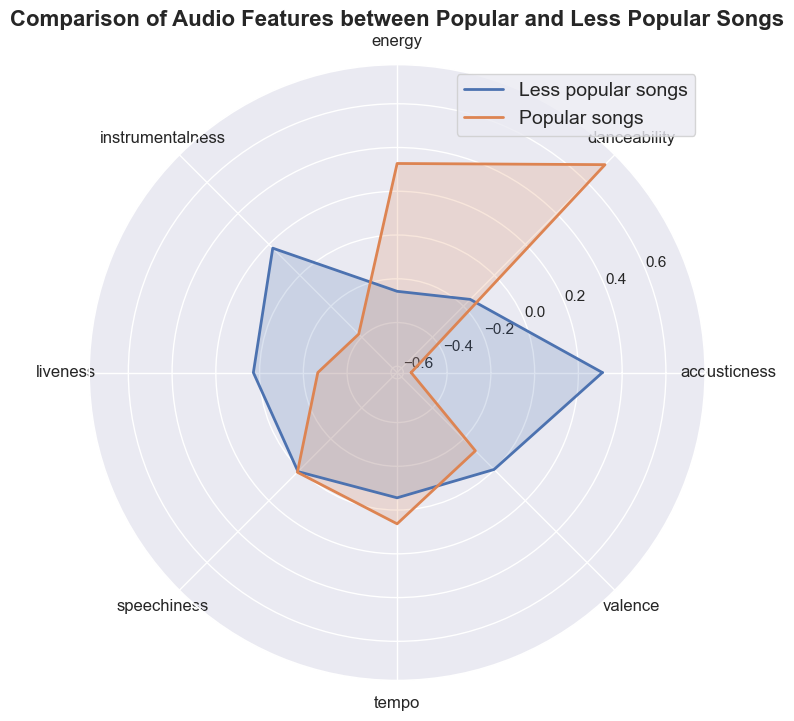

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Data
less_popular_features = less_popular_songs_copy[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']].mean().values
popular_features = popular_songs_copy[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']].mean().values

# Create a list of feature names
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

# Calculate the angle for each feature
angles = [n / float(len(feature_names)) * 2 * np.pi for n in range(len(feature_names))]
angles += angles[:1]

# Create a figure with a polar projection
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': 'polar'})

# Plot the data for less popular songs
ax.plot(angles, np.concatenate((less_popular_features, [less_popular_features[0]])), linewidth=2, label='Less popular songs')
ax.fill(angles, np.concatenate((less_popular_features, [less_popular_features[0]])), alpha=0.2)

# Plot the data for popular songs
ax.plot(angles, np.concatenate((popular_features, [popular_features[0]])), linewidth=2, label='Popular songs')
ax.fill(angles, np.concatenate((popular_features, [popular_features[0]])), alpha=0.2)

# Set the x-tick labels to the feature names and rotate them at 45 degrees
ax.set_xticks(angles[:-1])
ax.set_xticklabels(feature_names, fontsize=12, rotation=45)

# Add a legend and a title
ax.legend(loc='upper right', fontsize=14)
ax.set_title('Comparison of Audio Features between Popular and Less Popular Songs', fontsize=16, fontweight='bold')

# Show the chart
plt.show()
